# Import statements

In [516]:
from pandas import Series
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# First look...

In [435]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample = pd.read_csv('sample_submission.csv')
def inspect_data(data):
    print(f'Train data size - {data.shape[0]} rows and {data.shape[1]} columns')
    print(data.info())
    return data.head(10)

def subplot(rows=1, cols=1, figsize=(15,15)):
    figure, axes_plots = plt.subplots(rows, cols, figsize=figsize)
    figure.set_facecolor('white')
    return figure, axes_plots

In [436]:
inspect_data(train)

Train data size - 73799 rows and 19 columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         73799 non-null  int64  
 1   app_date          73799 non-null  object 
 2   education         73492 non-null  object 
 3   sex               73799 non-null  object 
 4   age               73799 non-null  int64  
 5   car               73799 non-null  object 
 6   car_type          73799 non-null  object 
 7   decline_app_cnt   73799 non-null  int64  
 8   good_work         73799 non-null  int64  
 9   score_bki         73799 non-null  float64
 10  bki_request_cnt   73799 non-null  int64  
 11  region_rating     73799 non-null  int64  
 12  home_address      73799 non-null  int64  
 13  work_address      73799 non-null  int64  
 14  income            73799 non-null  int64  
 15  sna               73799 non-null  int64  
 

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default
0,25905,01FEB2014,SCH,M,62,Y,Y,0,0,-2.008753,1,50,1,2,18000,4,1,N,0
1,63161,12MAR2014,SCH,F,59,N,N,0,0,-1.532276,3,50,2,3,19000,4,1,N,0
2,25887,01FEB2014,SCH,M,25,Y,N,2,0,-1.408142,1,80,1,2,30000,1,4,Y,0
3,16222,23JAN2014,SCH,F,53,N,N,0,0,-2.057471,2,50,2,3,10000,1,3,N,0
4,101655,18APR2014,GRD,M,48,N,N,0,1,-1.244723,1,60,2,3,30000,1,4,Y,0
5,41415,18FEB2014,SCH,M,27,Y,N,0,1,-2.032257,0,50,1,1,15000,2,3,N,0
6,28436,04FEB2014,SCH,M,39,N,N,0,0,-2.225004,0,60,1,2,28000,1,1,N,0
7,68769,17MAR2014,SCH,F,39,N,N,0,0,-1.522739,1,50,2,3,45000,3,3,N,0
8,38424,14FEB2014,SCH,F,50,Y,N,1,0,-1.676061,0,50,1,1,30000,1,4,N,0
9,4496,10JAN2014,UGR,F,54,N,N,0,0,-2.695176,1,50,2,3,24000,1,3,N,0


In [437]:
inspect_data(test)

Train data size - 36349 rows and 18 columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36349 entries, 0 to 36348
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         36349 non-null  int64  
 1   app_date          36349 non-null  object 
 2   education         36178 non-null  object 
 3   sex               36349 non-null  object 
 4   age               36349 non-null  int64  
 5   car               36349 non-null  object 
 6   car_type          36349 non-null  object 
 7   decline_app_cnt   36349 non-null  int64  
 8   good_work         36349 non-null  int64  
 9   score_bki         36349 non-null  float64
 10  bki_request_cnt   36349 non-null  int64  
 11  region_rating     36349 non-null  int64  
 12  home_address      36349 non-null  int64  
 13  work_address      36349 non-null  int64  
 14  income            36349 non-null  int64  
 15  sna               36349 non-null  int64  
 

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport
0,74835,22MAR2014,GRD,M,29,Y,Y,0,0,-2.271884,3,50,1,2,50000,1,4,N
1,17527,24JAN2014,SCH,F,39,N,N,5,0,-1.504999,2,50,1,2,5000,4,3,N
2,75683,23MAR2014,UGR,M,50,Y,Y,0,0,-1.691339,1,50,1,2,30000,1,3,Y
3,26883,03FEB2014,SCH,M,56,N,N,0,0,-2.374182,1,40,1,2,17000,1,3,N
4,28862,04FEB2014,GRD,F,38,N,N,0,0,-2.487502,0,80,2,3,120000,1,3,N
5,99881,17APR2014,SCH,F,55,N,N,0,0,-1.740224,7,50,3,3,30000,2,1,N
6,26630,02FEB2014,SCH,F,30,N,N,3,0,-1.387847,5,60,1,2,11000,4,3,N
7,79934,28MAR2014,GRD,M,41,Y,Y,0,0,-3.066047,3,60,1,3,80000,4,1,N
8,16605,23JAN2014,GRD,M,34,N,N,0,0,-3.117086,0,80,2,3,5000,1,2,N
9,105449,24APR2014,UGR,M,28,Y,Y,0,0,-2.185172,0,80,2,3,80000,1,3,Y


In [438]:
inspect_data(sample)

Train data size - 24354 rows and 2 columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24354 entries, 0 to 24353
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   client_id  24354 non-null  int64  
 1   default    24354 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 380.7 KB
None


,client_id,default
0,66799,0.441004
1,25379,0.138092
2,28825,0.373370
3,37530,0.476501
4,4264,0.304640
5,175,0.311599
6,57558,0.584807
7,88407,0.815792
8,79183,0.325037
9,69300,0.094011


Sample is an example of the result we have to get with our predictor model.
Column default is actually value which our model should predict correctly.
We have test data which does not contain column 'default'. And we have train data
to train and test our model.
## Let's start!!!


### First let's look at our target column 'default

<AxesSubplot:ylabel='default'>

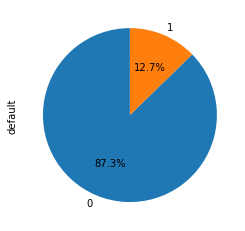

In [439]:
train.default.value_counts().plot.pie(autopct='%1.1f%%', startangle=90)

## About columns

1. client_id - identification (integer not included)
2. app_date - application date (categorical)
3. education - education level (categorical)
4. sex - sex (binary)
5. age - age (numerical)
6. car - client has a car (binary)
7. car_type - whether car is international (binary)
8. decline_app_cnt - declined application count in the past (numerical)
9. good_work - binary has a well paid job (binary)
10. score_bki - BKI score (numerical)
11. bki_request_cnt - requests to BKI (numerical)
12. region_rating - region rating (categorical)
13. home_address - category of home address (categorical)
14. work_address - category of work address (categorical)
15. income - income amount (numerical)
16. sna - connection with bank employee (categorical)
17. first_time - age of information about the client (categorical)
18. foreign_passport - has foreign passport (binary)
19. default - went default (binary target)

# Do we have unfilled values?
Train and test data had one 'education' column containing unfilled values let's merge train
and test data and fill values.

<AxesSubplot:ylabel='education'>

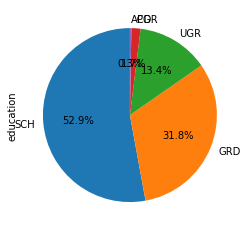

In [440]:
# first let's look what we have home_address
train.education.value_counts().plot.pie(autopct='%1.1f%%', startangle=90)

<AxesSubplot:ylabel='education'>

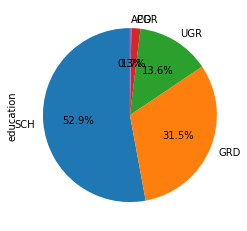

In [441]:
test.education.value_counts().plot.pie(autopct='%1.1f%%', startangle=90)

In [442]:
# It's not too bad idea to fill all nan values with most common value
# if the percentage of nan values are small. Let's check...
print(train.education.isna().value_counts())
print(test.education.isna().value_counts())

False    73492
True       307
Name: education, dtype: int64
False    36178
True       171
Name: education, dtype: int64


In [443]:
# ok merge data and don't forget about target value which test data does not h2iFrakO2UNtnUmJW3yZd8a7pLCET2FL31FrveVGCiUkSpNQGbaKu
train['sample'] = 1
test['sample'] = 0
test['default'] = -1
data = train.append(test, sort=False).reset_index(drop=True)
data.describe()

,client_id,age,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,default,sample
count,110148.000000,110148.000000,110148.000000,110148.000000,110148.000000,110148.000000,110148.000000,110148.000000,110148.000000,110148.000000,110148.000000,110148.000000,110148.000000,110148.000000
mean,55074.500000,39.249410,0.273205,0.165514,-1.904535,2.005002,56.751189,1.574945,2.497867,41012.648537,1.731588,2.765570,-0.244916,0.669999
std,31797.133063,11.518063,0.799099,0.371645,0.499397,2.266926,13.065923,0.527562,0.687651,45399.735051,1.122652,1.010151,0.595908,0.470215
min,1.000000,21.000000,0.000000,0.000000,-3.624586,0.000000,20.000000,1.000000,1.000000,1000.000000,1.000000,1.000000,-1.000000,0.000000
25%,27537.750000,30.000000,0.000000,0.000000,-2.260434,0.000000,50.000000,1.000000,2.000000,20000.000000,1.000000,2.000000,-1.000000,0.000000
50%,55074.500000,37.000000,0.000000,0.000000,-1.920823,1.000000,50.000000,2.000000,3.000000,30000.000000,1.000000,3.000000,0.000000,1.000000
75%,82611.250000,48.000000,0.000000,0.000000,-1.567888,3.000000,60.000000,2.000000,3.000000,48000.000000,2.000000,4.000000,0.000000,1.000000
max,110148.000000,72.000000,33.000000,1.000000,0.199773,53.000000,80.000000,3.000000,3.000000,1000000.000000,4.000000,4.000000,1.000000,1.000000


In [444]:
data.education.fillna(data.education.value_counts().index[0], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110148 entries, 0 to 110147
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   client_id         110148 non-null  int64  
 1   app_date          110148 non-null  object 
 2   education         110148 non-null  object 
 3   sex               110148 non-null  object 
 4   age               110148 non-null  int64  
 5   car               110148 non-null  object 
 6   car_type          110148 non-null  object 
 7   decline_app_cnt   110148 non-null  int64  
 8   good_work         110148 non-null  int64  
 9   score_bki         110148 non-null  float64
 10  bki_request_cnt   110148 non-null  int64  
 11  region_rating     110148 non-null  int64  
 12  home_address      110148 non-null  int64  
 13  work_address      110148 non-null  int64  
 14  income            110148 non-null  int64  
 15  sna               110148 non-null  int64  
 16  first_time        11

In [445]:
num_cols = ['age','decline_app_cnt','score_bki','income','bki_request_cnt']
cat_cols = ['education','work_address','home_address','sna','first_time','region_rating']
bin_cols = ['sex','car','car_type','good_work','foreign_passport']

# Let's explore data (Exploratory Data Analysis)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


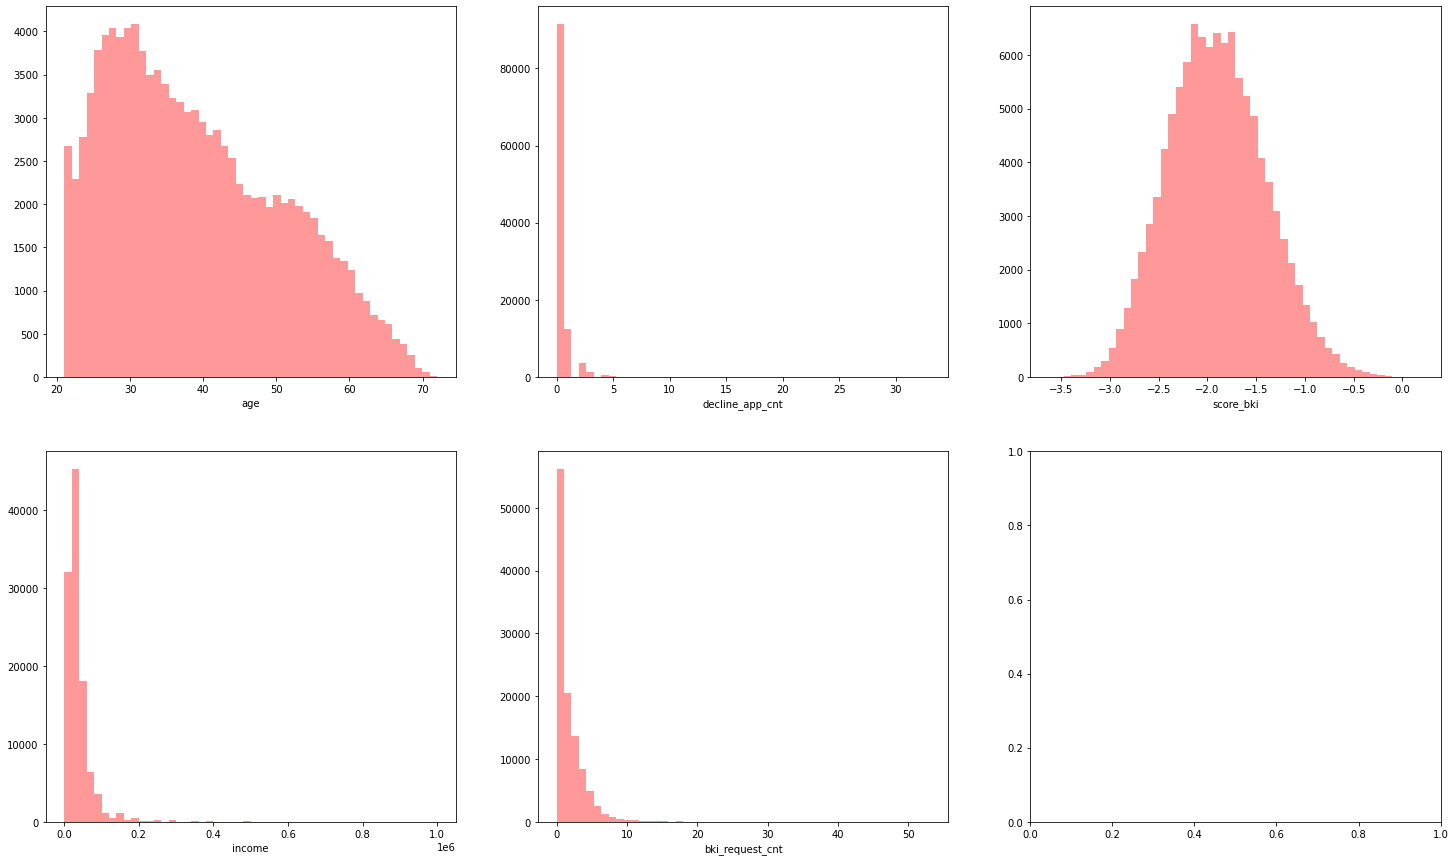

In [446]:
fig, axes = subplot(2, 3, figsize=(25,15))
color = 'r'
for i,col in enumerate(num_cols):
    sns.distplot(data[col], kde=False, ax=axes.flat[i], bins=50, color=color)

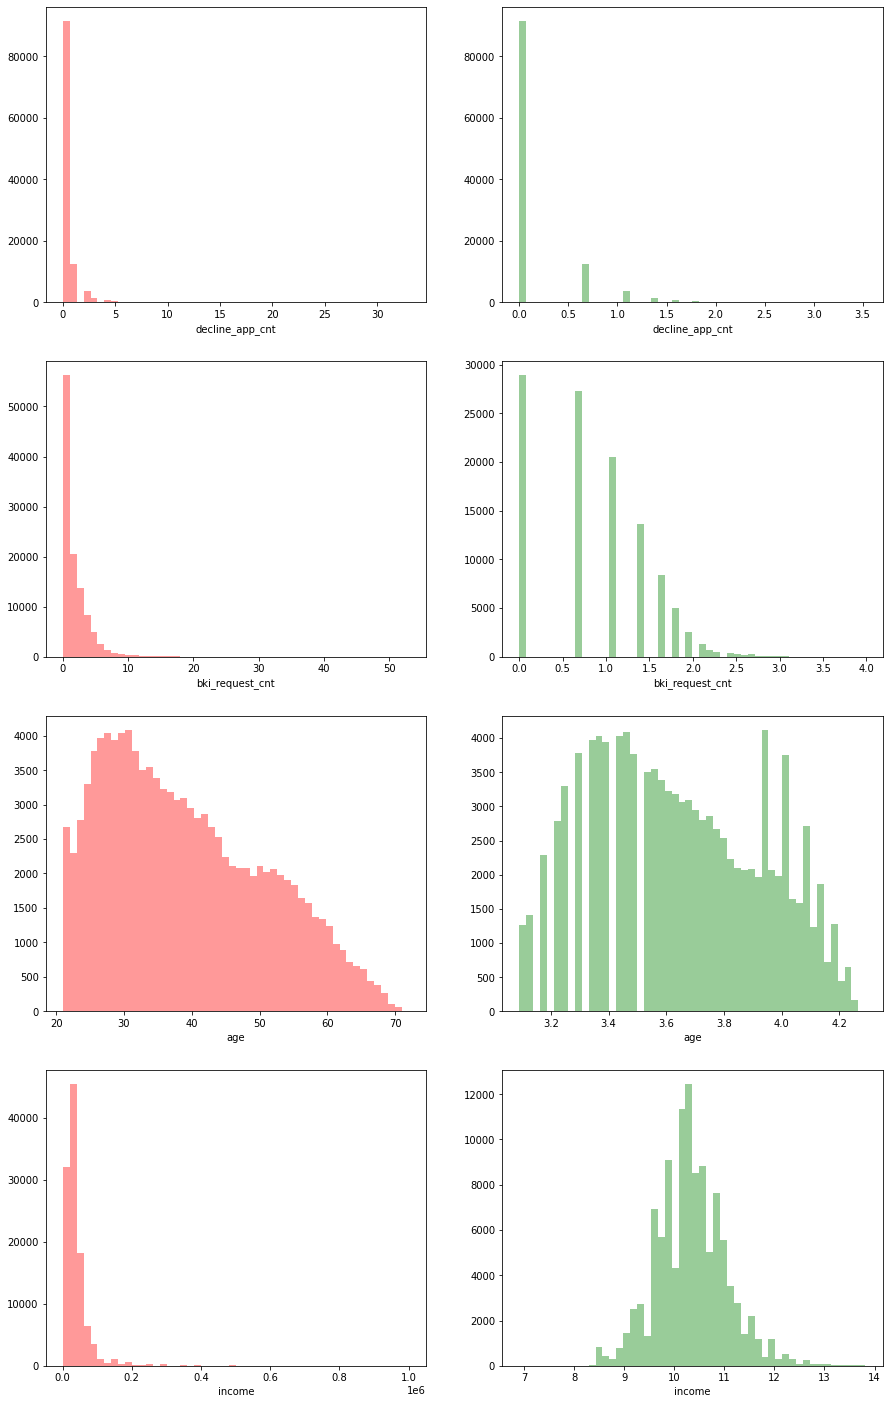

In [447]:

# Ok normalize distribution for some numerical columns and compare with source
fig, axes = subplot(4, 2, figsize=(15,25))
# for i,col in enumerate(['decline_app_cnt','decline_app_cnt', 'bki_request_cnt','bki_request_cnt', 'income', 'income']):
for i,col in enumerate(['decline_app_cnt','decline_app_cnt', 'bki_request_cnt','bki_request_cnt', 'age', 'age', 'income', 'income']):
    if i % 2 != 0:
        data[col] = np.log(data[col] + 1)
        color = 'g'
    else:
        color = 'r'
    sns.distplot(data[col], kde=False, ax=axes.flat[i], bins=50, color=color)


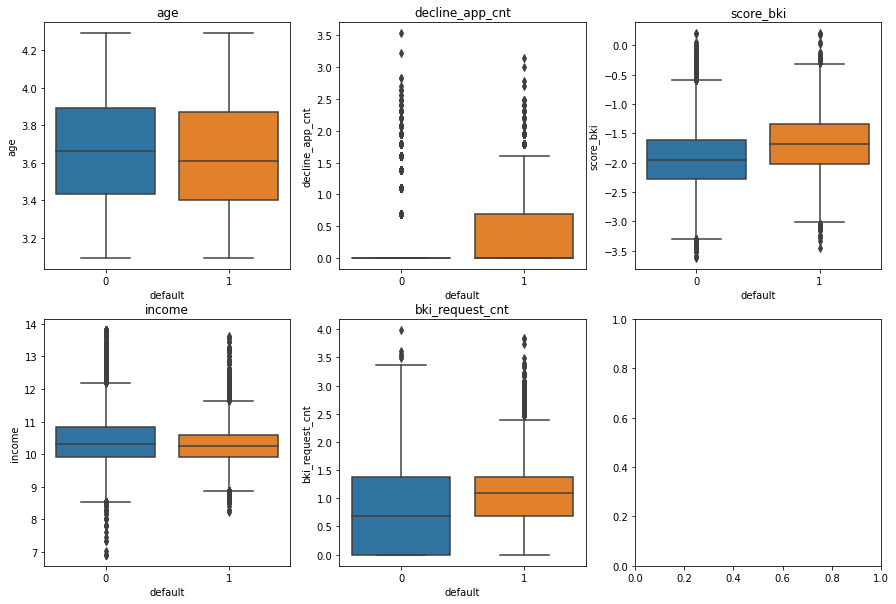

In [448]:
# Look at num_cols from other projection
fig, axes = subplot(2, 3, figsize = (15, 10))
for i, col in enumerate(num_cols):
    sns.boxplot(x='default', y=col, data=data[data['default']!=-1],ax=axes.flat[i])
    axes.flat[i].set_title(col)

plt.show()

## Interpretation
1. Older clients default less than young.
2. decline_app_cnt is higher on clients who may default.
3. score_bki is also higher.
4. On average, people who do not default have higher income.
5. BKI requests are higher in people who do not default.

# What about dates?

In [449]:
# Apply the same for categorical columns first
# But before let's check what date column says:
data['app_date'].value_counts()

18MAR2014    1491
19MAR2014    1363
17MAR2014    1350
31MAR2014    1317
07APR2014    1296
             ... 
20APR2014     359
07JAN2014     349
03JAN2014     313
02JAN2014     204
01JAN2014      56
Name: app_date, Length: 120, dtype: int64

In [450]:
# Logically dates don't say anything about the client. But some seasons or months may give
# an interesting information. So let's check and decide to keep dates in dataset or remove.
data['app_date'] = pd.to_datetime(data['app_date'], format='%d%b%Y')
data['year'] = data['app_date'].apply(lambda x: x.year)
data['month'] = data['app_date'].apply(lambda x: x.month)
data['day'] = data['app_date'].apply(lambda x: x.day)

data.sort_values('app_date')

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,...,work_address,income,sna,first_time,foreign_passport,default,sample,year,month,day
11038,42,2014-01-01,UGR,F,3.871201,Y,N,0.000000,0,-2.211580,...,3,10.463132,1,4,Y,0,1,2014,1,1
25920,14,2014-01-01,SCH,F,3.610918,N,N,0.000000,0,-2.164185,...,1,11.407576,1,4,Y,0,1,2014,1,1
72759,56,2014-01-01,UGR,M,3.258097,N,N,0.000000,1,-1.629831,...,3,10.819798,1,3,N,0,1,2014,1,1
108665,35,2014-01-01,GRD,M,3.583519,N,N,0.000000,1,-2.211979,...,2,10.819798,1,3,Y,-1,0,2014,1,1
31672,20,2014-01-01,SCH,M,3.871201,N,N,1.609438,0,-2.047099,...,2,10.308986,1,2,N,0,1,2014,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64006,109644,2014-04-30,UGR,F,3.401197,N,N,0.000000,0,-1.937661,...,3,9.615872,1,2,N,0,1,2014,4,30
50840,109937,2014-04-30,SCH,M,3.637586,Y,N,0.000000,0,-1.372804,...,1,10.308986,3,1,N,0,1,2014,4,30
81386,110116,2014-04-30,SCH,F,3.850148,N,N,0.000000,0,-2.049589,...,3,9.798183,3,2,N,-1,0,2014,4,30
1170,110060,2014-04-30,GRD,M,3.713572,N,N,0.000000,1,-2.211677,...,3,11.652696,1,3,N,0,1,2014,4,30


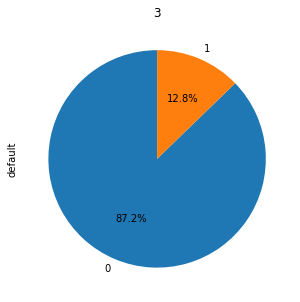

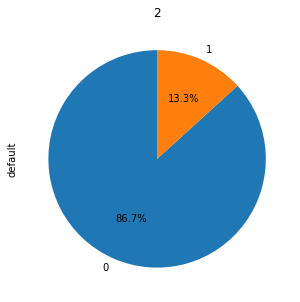

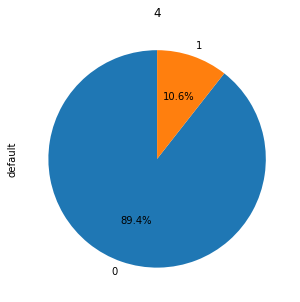

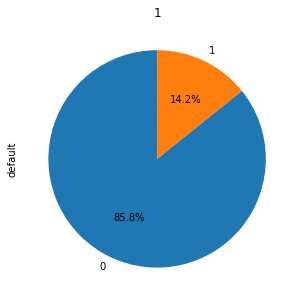

In [451]:
# Ok we have data for 4 months from jan to may of 2014th year
# Let's see defaults for each month. This may help us decide.

# iterating through count_values method we also sort data by month
for month in data.month.value_counts().index:
    fig, axes = subplot(figsize = (15, 5))
    data[((data['default']!=-1) & (data['month'] == month))].default.value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
    axes.set_title(month)
    plt.show()

In [452]:
# Very small difference does not make sense so we can get rid of dates
data.drop(['app_date', 'month', 'year', 'day'], axis=1, inplace=True)

# Categorical columns

In [453]:
data[cat_cols].head()

,education,work_address,home_address,sna,first_time,region_rating
0,SCH,2,1,4,1,50
1,SCH,3,2,4,1,50
2,SCH,2,1,1,4,80
3,SCH,3,2,1,3,50
4,GRD,3,2,1,4,60


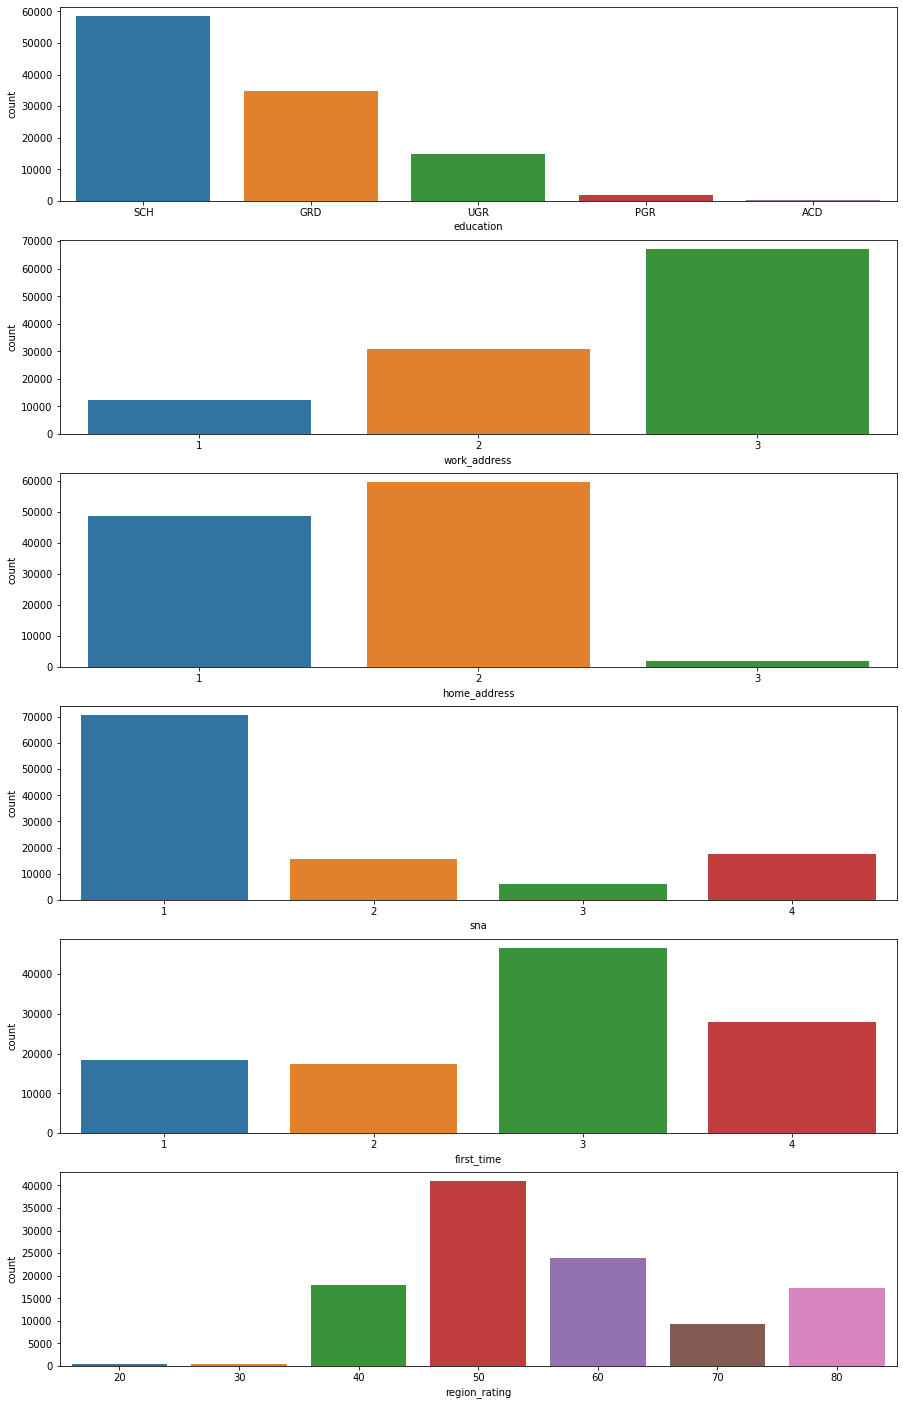

In [454]:
fig, axes = subplot(6, figsize = (15, 25))
for i,col in enumerate(cat_cols):
    sns.countplot(x=data[col], ax=axes[i])

plt.show()

In [455]:
data[cat_cols].head()

,education,work_address,home_address,sna,first_time,region_rating
0,SCH,2,1,4,1,50
1,SCH,3,2,4,1,50
2,SCH,2,1,1,4,80
3,SCH,3,2,1,3,50
4,GRD,3,2,1,4,60


In [456]:
# encode binary columns columns
label_encoder = LabelEncoder()
encode_cols = ['foreign_passport', 'car_type', 'car', 'sex']

for column in encode_cols:
    data[column] = label_encoder.fit_transform(data[column])
data[bin_cols].head()

,sex,car,car_type,good_work,foreign_passport
0,1,1,1,0,0
1,0,0,0,0,0
2,1,1,0,0,1
3,0,0,0,0,0
4,1,0,0,1,1


In [457]:
# By the way education column also needs encoding
data['education'] = label_encoder.fit_transform(data['education'])
# Now we have all columns ready for correlation Analysis
data.head()

,client_id,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default,sample
0,25905,3,1,4.143135,1,1,0.000000,0,-2.008753,0.693147,50,1,2,9.798183,4,1,0,0,1
1,63161,3,0,4.094345,0,0,0.000000,0,-1.532276,1.386294,50,2,3,9.852247,4,1,0,0,1
2,25887,3,1,3.258097,1,0,1.098612,0,-1.408142,0.693147,80,1,2,10.308986,1,4,1,0,1
3,16222,3,0,3.988984,0,0,0.000000,0,-2.057471,1.098612,50,2,3,9.210440,1,3,0,0,1
4,101655,1,1,3.891820,0,0,0.000000,1,-1.244723,0.693147,60,2,3,10.308986,1,4,1,0,1


## Correlation analysis

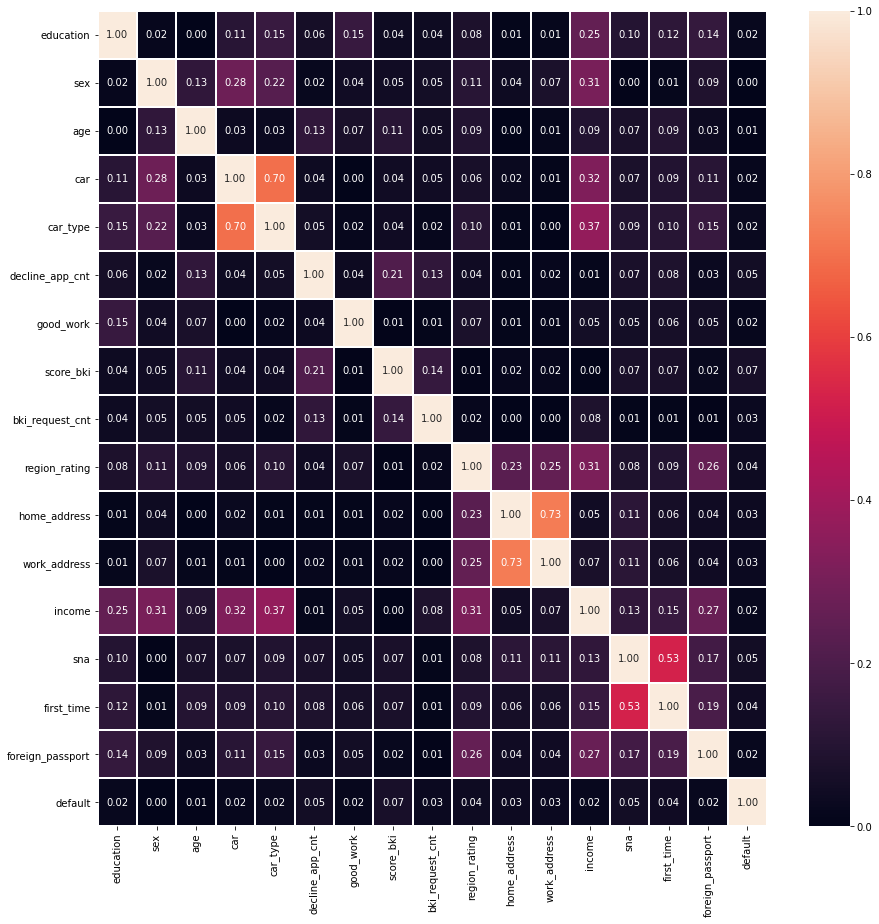

In [458]:
fig, axes = subplot()
sns.heatmap(data.drop(['client_id', 'sample'], axis=1).corr().abs(), vmin=0,
            vmax=1, annot=True, fmt=".2f", linewidths=0.1);

We see high correlation between:
* car - car_type
* home_address - work_address

We decide to get rid of car_type, work_address and GRD columns

In [459]:
data.drop(['car_type', 'work_address'], axis=1, inplace = True)

In [460]:
bin_cols.remove('car_type')
cat_cols.remove('work_address')

# Let's compute ANOVA F-value for our columns and then do feature engineering

<AxesSubplot:>

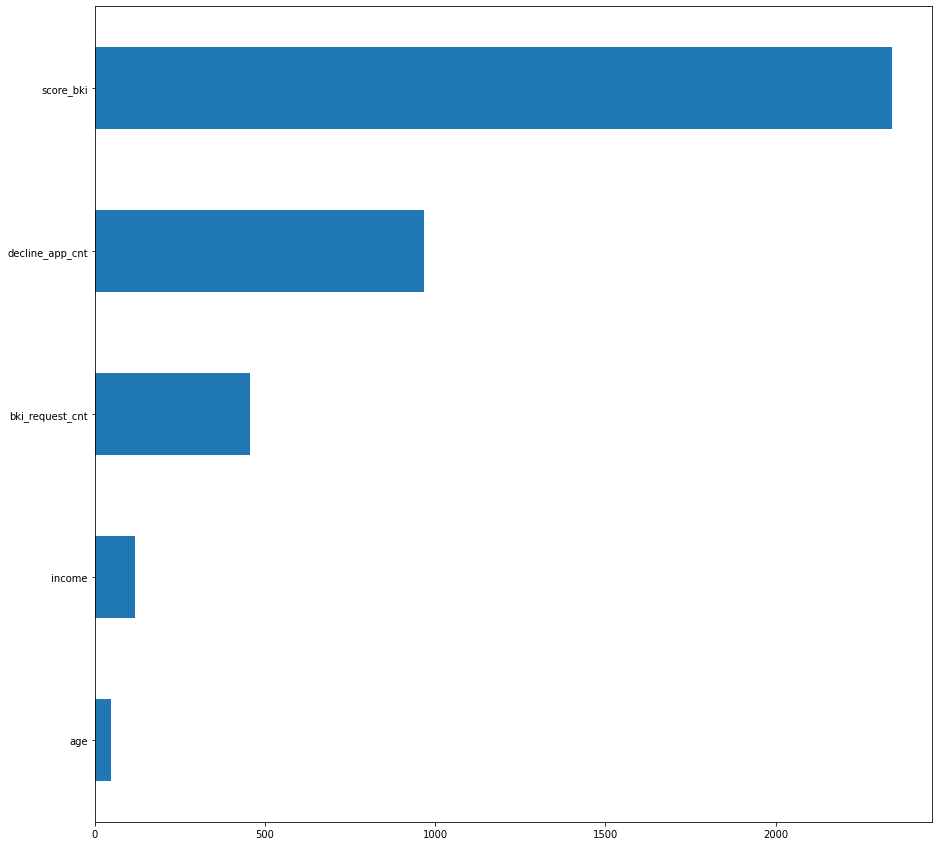

In [461]:
# Compute the ANOVA F-value of num_columns
fig, axes = subplot()
imp_num = pd.Series(f_classif(train[num_cols], train['default'])[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

<AxesSubplot:>

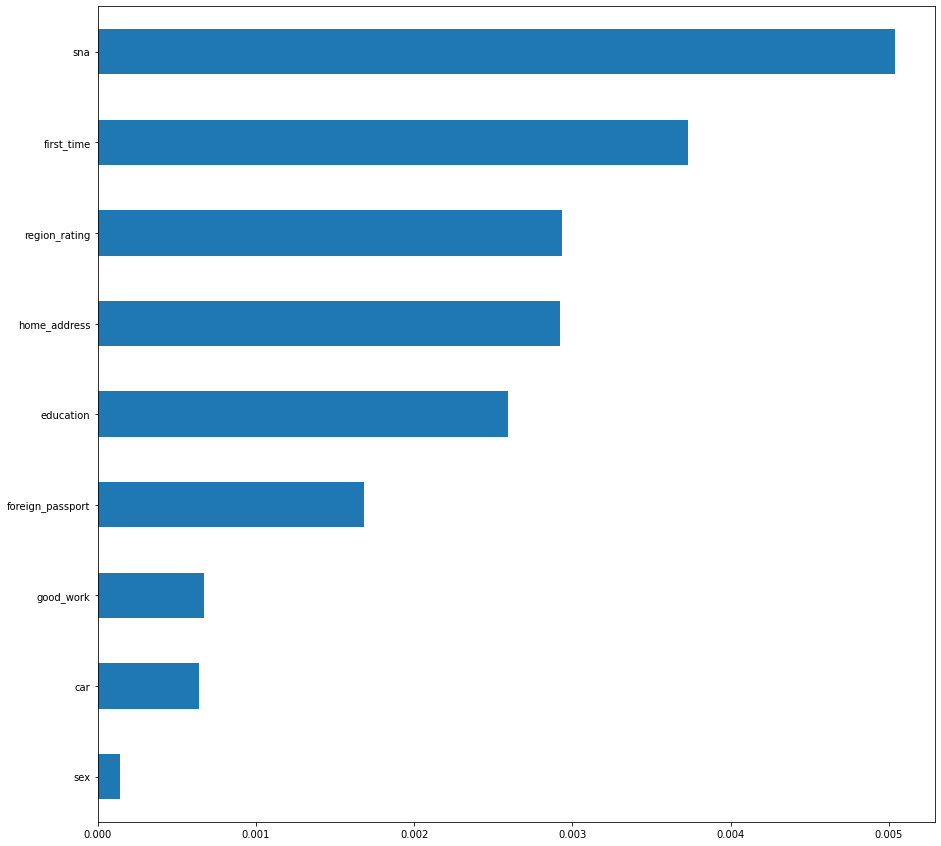

In [462]:
# and also binary and categorical columns
fig, axes = subplot()
imp_cat = Series(mutual_info_classif(data[bin_cols + cat_cols], data['default'],
                                     discrete_features =True), index = bin_cols + cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

# Some feature engineering

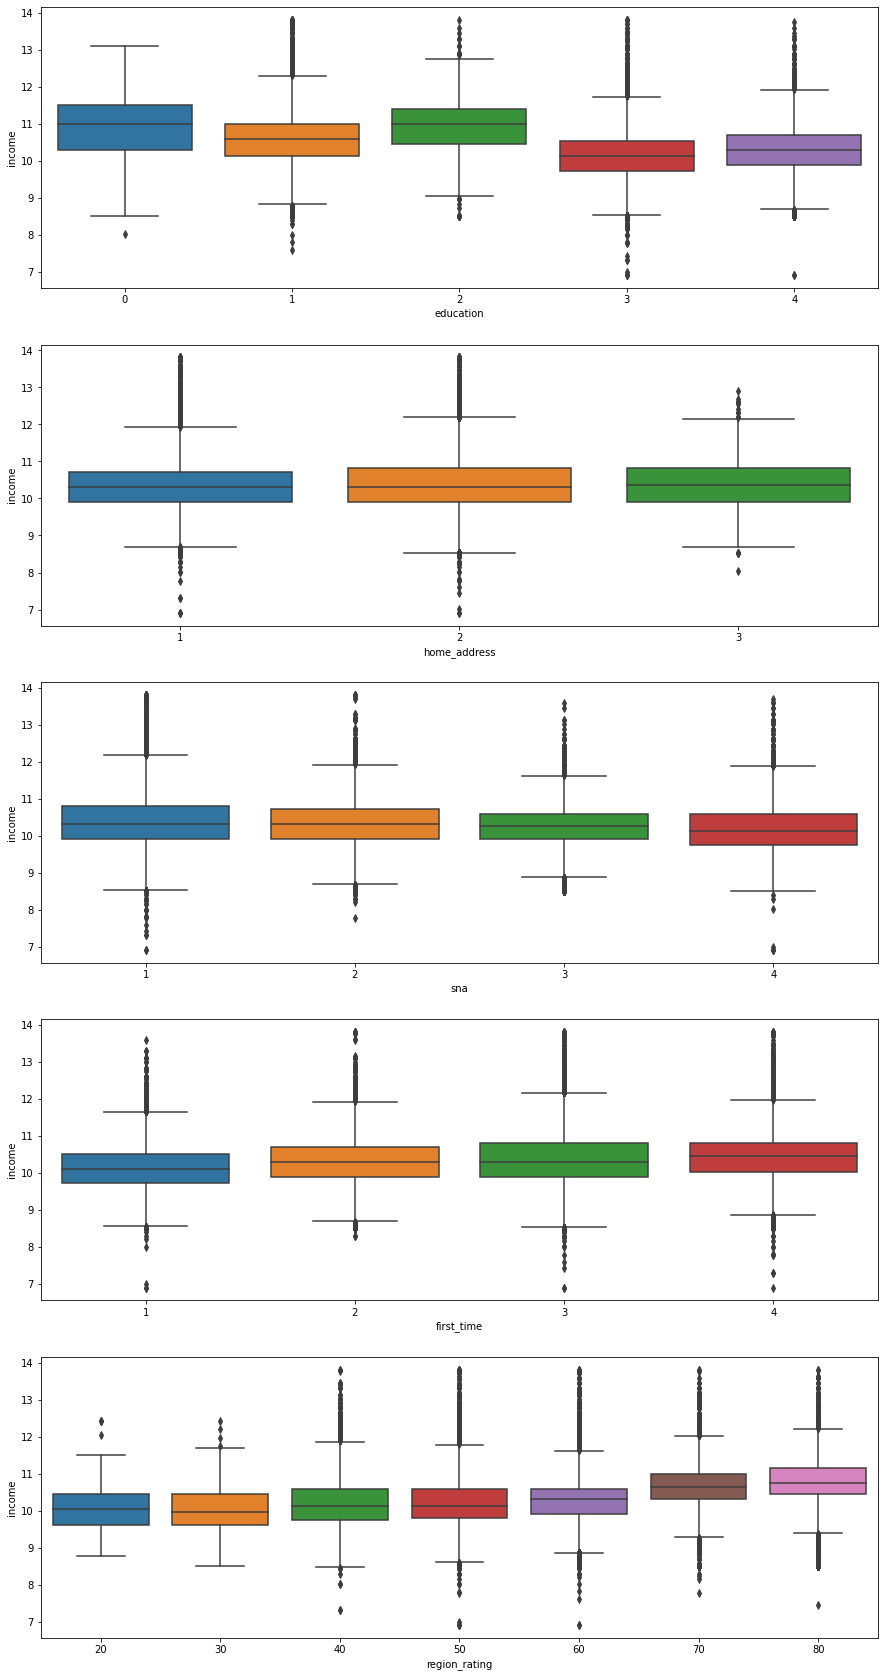

In [463]:
fig, axes = subplot(5, figsize = (15, 30))
for i, col in enumerate(cat_cols):
    sns.boxplot(x=col, y='income', data=data[data['default'] != -1], ax=axes.flat[i])

### Assume regions with higher rating are well paid and add new column

In [464]:
data['region_income'] = data['region_rating'].apply(lambda x: 1 if x <= 30 else 2 if 30 < x <= 60 else 3)

<AxesSubplot:xlabel='age', ylabel='income'>

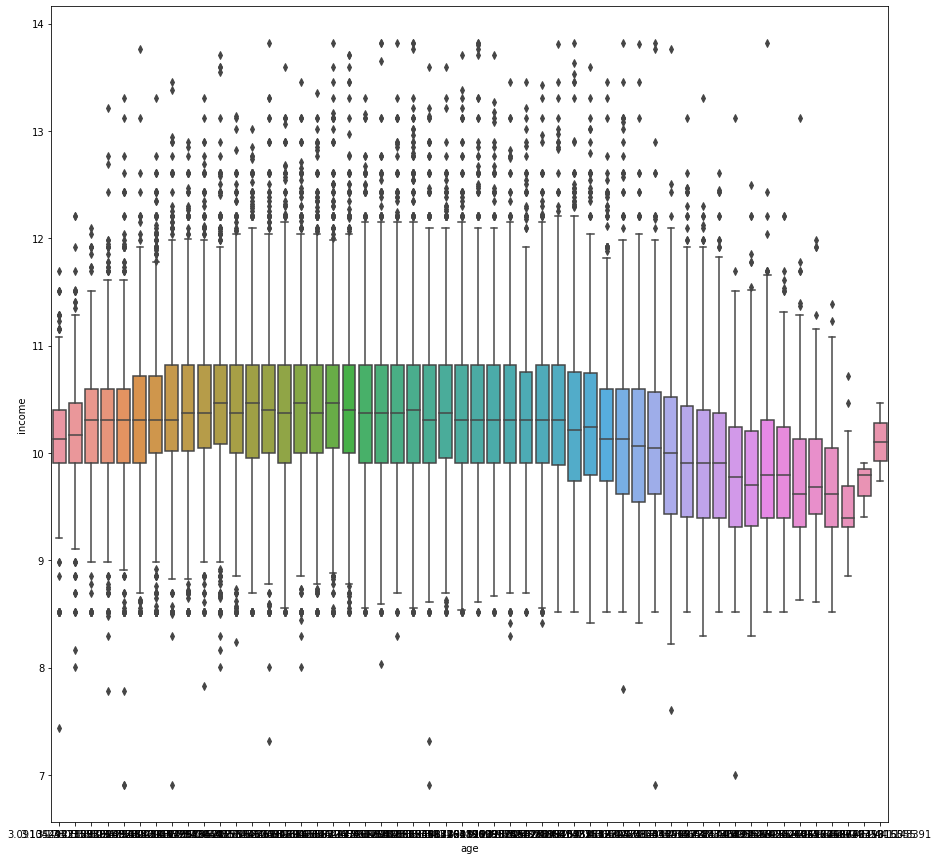

In [465]:
fig, axes = subplot()
sns.boxplot(x='age', y='income', data=data[data['default'] != -1])

In [466]:
data_copy = data.copy()

In [467]:
avg_income = data_copy.groupby('age')['income'].mean().to_dict()
data_copy['avg_income'] = data_copy['age'].map(avg_income)

In [468]:
avg_bki_req = data_copy.groupby('income')['bki_request_cnt'].mean().to_dict()
data_copy['avg_bki_req'] = data_copy['income'].map(avg_bki_req)

In [469]:
avg_reg_income = data_copy.groupby('region_rating')['income'].mean().to_dict()
data_copy['avg_reg_income'] = data_copy['region_rating'].map(avg_reg_income)

In [470]:
avg_bki_req_region = data_copy.groupby('region_rating')['bki_request_cnt'].mean().to_dict()
data_copy['avg_bki_req_region'] = data_copy['region_rating'].map(avg_bki_req_region)

In [471]:
age_score = data_copy.groupby('age')['score_bki'].mean().to_dict()
data_copy['age_score'] = data_copy['age'].map(age_score)

In [472]:
avg_score_bki_request = data_copy.groupby('score_bki')['bki_request_cnt'].mean().to_dict()
data_copy['avg_score_bki_request'] = data_copy['score_bki'].map(avg_score_bki_request)

In [473]:
cat_cols.append('region_income')
num_cols += ['avg_income', 'avg_bki_req', 'avg_reg_income', 'avg_bki_req_region', 'age_score', 'avg_score_bki_request']

In [474]:
# for col in num_cols:
#     median = data_copy[col].median()
#     IQR = data_copy[col].quantile(0.75) - data_copy[col].quantile(0.25)
#     perc25 = data_copy[col].quantile(0.25)
#     perc75 = data_copy[col].quantile(0.75)
#     mean = data_copy[col].mean()
#     print("Column: ", col)
#     print(' 25%: {:.4},\n'.format(perc25), '75%: {:.4},\n'.format(perc75),
#           "IQR: {:.4}, \n".format(IQR), "Borderline: [{f:.4}, {l:.4}].\n".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
#     print()
#         # replace outliers with border-values
#     data_copy[col] = np.where(data_copy[col] > (perc75 + 1.5*IQR), (mean + 1.5*IQR), data_copy[col])
#     data_copy[col] = np.where(data_copy[col] < (perc25 - 1.5*IQR), (mean - 1.5*IQR), data_copy[col])

In [490]:
ohe = OneHotEncoder(sparse = False)
train_data = data_copy[data_copy['sample'] == 1]
test_data = data_copy[data_copy['sample'] == 0].drop('default', axis=1)
X_cat_train = ohe.fit_transform(train_data[cat_cols].values)
X_cat_test = ohe.fit_transform(test_data[cat_cols].values)

In [476]:
X_num_train = StandardScaler().fit_transform(train_data[num_cols].values)
X_num_test = StandardScaler().fit_transform(test_data[num_cols].values)

In [501]:
X_train_data = np.hstack([X_num_train, train_data[bin_cols].values, X_cat_train])
Y_train_data = train_data['default']
X_test_data = np.hstack([X_num_test, test_data[bin_cols].values, X_cat_test])

In [502]:
# Ensure train and test data
# print(train_data.shape)
# print(test_data.shape)


# Define X. y
X = X_train_data
Y = Y_train_data.values

In [503]:
X_train, X_t, y_train, y_t = train_test_split(X, Y, test_size=0.20, random_state=42)

In [504]:
lr = LogisticRegression(max_iter = 1000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_t)

In [505]:
probs = lr.predict_proba(X_t)
probs = probs[:,1]

In [506]:
fpr, tpr, threshold = roc_curve(y_t, probs)
roc_auc = roc_auc_score(y_t, probs)

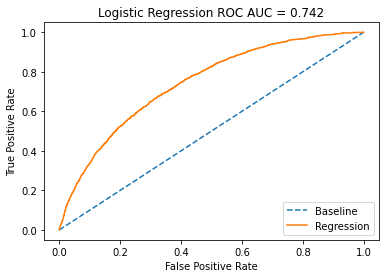

In [507]:
plt.figure(facecolor='white')
plt.plot([0, 1], label='Baseline', linestyle='--')
plt.plot(fpr, tpr, label = 'Regression')
plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

In [508]:
print('accuracy_score:',accuracy_score(y_t,y_pred))
print('precision_score:',precision_score(y_t,y_pred))
print('recall_score:',recall_score(y_t,y_pred))
print('f1_score:',f1_score(y_t,y_pred))

accuracy_score: 0.8752710027100271
precision_score: 0.4270833333333333
recall_score: 0.022441160372194856
f1_score: 0.04264170566822673


[Text(0.5, 0, 'Predicted'), Text(0, 0.5, 'True')]

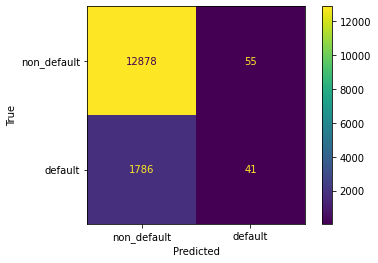

In [509]:

cm = confusion_matrix(y_t, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['non_default','default'])
cmd.plot()
cmd.ax_.set(xlabel='Predicted', ylabel='True')

# Tuning!!!

In [488]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }


In [489]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold

In [512]:
X_train = X_train_data
y_train = Y_train_data.values
X_test = X_test_data

In [497]:
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

In [498]:
from sklearn.model_selection import RandomizedSearchCV

folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(X_train,y_train), verbose=3, random_state=1001 )

random_search.fit(X_train, y_train)


Fitting 3 folds for each of 5 candidates, totalling 15 fits


/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:41:38] WARNING: ../src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:41:38] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x7f9a44b9d820>,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=0.02,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing...
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           scale_pos_weight=None, silent=True,
                                           subsa

In [499]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
results.to_csv('xgb-random-grid-search-results-01.csv', index=False)


 All results:
{'mean_fit_time': array([16.92212041, 31.49863545, 26.14748557, 18.45228982, 25.16973178]), 'std_fit_time': array([0.10690711, 0.11662864, 0.1460272 , 0.02387796, 0.06150608]), 'mean_score_time': array([0.10221457, 0.22610203, 0.23166426, 0.25301298, 0.15750011]), 'std_score_time': array([0.00388936, 0.00359852, 0.00136579, 0.00496105, 0.00216767]), 'param_subsample': masked_array(data=[1.0, 0.6, 0.8, 1.0, 0.8],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_min_child_weight': masked_array(data=[5, 1, 5, 5, 1],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[3, 5, 5, 5, 4],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[5, 1.5, 1, 5, 1],
             mask=[False, False, False, False, False],
       fill_value='?',
         

In [513]:
y_pred = random_search.predict_proba(X_test)
results_df = pd.DataFrame(data={'client_id':test['client_id'], 'default':y_pred[:,1]})


In [514]:
results_df

,client_id,default
0,74835,0.032997
1,17527,0.262426
2,75683,0.081759
3,26883,0.061983
4,28862,0.016914
...,...,...
36344,83775,0.356230
36345,106254,0.025080
36346,81852,0.295112
36347,1971,0.269443


In [515]:
results_df.to_csv('submission2.csv', index=False)